# Heart Attack Prediction

**This document attempts to predict heart attack based on known factors from the available dataset**

### Initiate the project

In [1]:
# Get dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Igonre warning messages
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load dataset. Data taken from Kaggle.

df = pd.read_csv('./datasets/heart attack prediction/heart.csv')

### Get more information about the dataset

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Preprocessing data for Exploratory Data Analysis

Int64Index([1, 0], dtype='int64') [165 138]


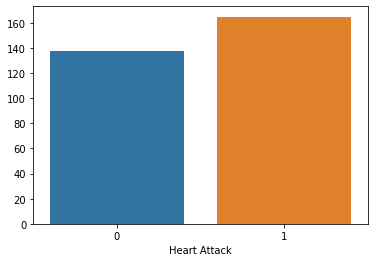

In [11]:
# Check if data is balanced

xs = df['output'].value_counts().index
ys = df['output'].value_counts().values

print (xs, ys)

ax = sns.barplot(xs, ys)
ax.set_xlabel('Heart Attack')
plt.show()

As the sample data is slightly imbalanced, we will balance it before fitting the data to the model.

### Exploratory Data Analysis (Categorical vs Output)

In [30]:
# Find the correlation between each column and the output

# Create factory function for categorical columns in percentage
# Categorical columns are: sex, exang, caa, cp, fbs and restecg

def plot_x_vs_out(df, col, axis):
    x_axis = []
    y_axis = []
    
    unique_val = df[col].unique()
    
    for val in unique_val:
        output_1 = len(df[(df[col] == val) & (df['output'] == 1)])
        total = len(df[df[col] == val])
        percentage = (output_1 / total) *100
        x_axis.append(val)
        y_axis.append(percentage)
        
    splot = sns.barplot(x_axis, y_axis, ax=axis)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Text(0, 0.5, '%Heart Attack')

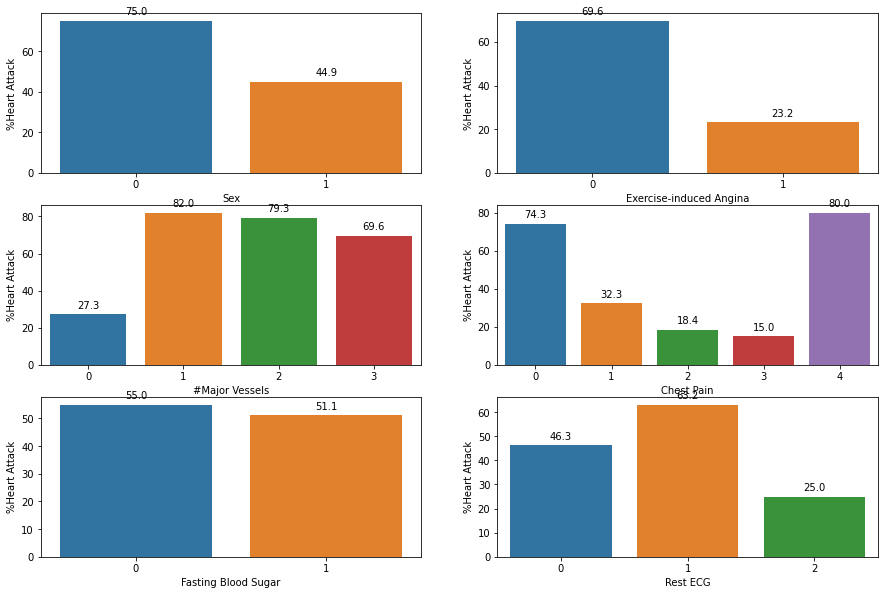

In [31]:
# Chart the graphs

fig, axes = plt.subplots(3,2, figsize=(15,10))

plot_x_vs_out(df, 'sex', axes[0,0])
axes[0,0].set_xlabel('Sex')
axes[0,0].set_ylabel('%Heart Attack')

plot_x_vs_out(df, 'exng', axes[0,1])
axes[0,1].set_xlabel('Exercise-induced Angina')
axes[0,1].set_ylabel('%Heart Attack')

plot_x_vs_out(df, 'cp', axes[1,0])
axes[1,0].set_xlabel('#Major Vessels')
axes[1,0].set_ylabel('%Heart Attack')

plot_x_vs_out(df, 'caa', axes[1,1])
axes[1,1].set_xlabel('Chest Pain')
axes[1,1].set_ylabel('%Heart Attack')

plot_x_vs_out(df, 'fbs', axes[2,0])
axes[2,0].set_xlabel('Fasting Blood Sugar')
axes[2,0].set_ylabel('%Heart Attack')

plot_x_vs_out(df, 'restecg', axes[2,1])
axes[2,1].set_xlabel('Rest ECG')
axes[2,1].set_ylabel('%Heart Attack')

**Insights from categorical data**

1. Males (sex index 0) are more likely to have a heart attack.
2. People who do not do exercise-induced angina (exng index 0) are more likely to have a heart attack.
3. People with 1-3 major vessels have a high percentage of heart attack.
4. People with typical angina (caa index 0) and asymptomatic angina (caa index 4) have much higher percentage of heart attack occurrence.
5. Lower fasting blood sugar < 120 mg/dl (fbs index 0) has slightly higher occurrence of heart attack than the higher FBS.
6. People with ST-T abnormality (restecg index 1) has the higher chance than normal people to experience heart attack, while interestingly, people with left ventricular hypertrophy (restecg index 2) has lower chance than normal people to experience heart attack.

### Exploratory Data Analysis (Statistical vs Output)

Text(10.049999999999997, 0.5, 'Age (yrs)')

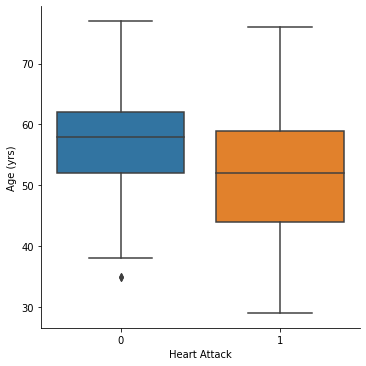

In [46]:
# Chart the graphs
# Numerical columns are: age, trtbps, chol, thalachh and oldpeak

sns.catplot(x="output", y="age", kind="box", data=df)
plt.xlabel('Heart Attack')
plt.ylabel('Age (yrs)')


Text(3.674999999999997, 0.5, 'Resting Blood Pressure (mmHg)')

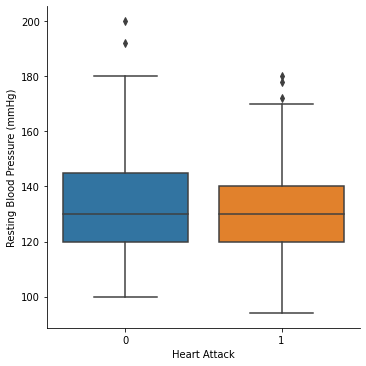

In [47]:
sns.catplot(x="output", y="trtbps", kind="box", data=df)
plt.xlabel('Heart Attack')
plt.ylabel('Resting Blood Pressure (mmHg)')

Text(3.799999999999997, 0.5, 'Cholesterol (mg/dl)')

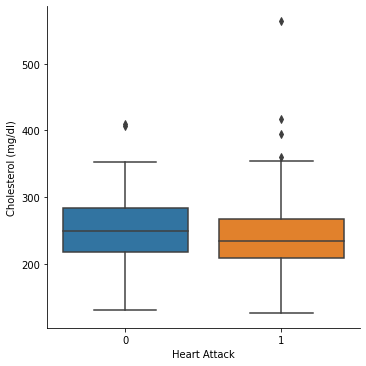

In [48]:
sns.catplot(x="output", y="chol", kind="box", data=df)
plt.xlabel('Heart Attack')
plt.ylabel('Cholesterol (mg/dl)')

Text(3.674999999999997, 0.5, 'Max Heart Rate (bpm)')

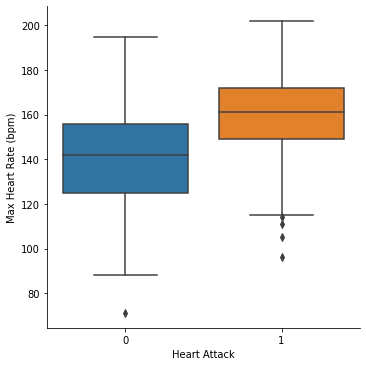

In [49]:
sns.catplot(x="output", y="thalachh", kind="box", data=df)
plt.xlabel('Heart Attack')
plt.ylabel('Max Heart Rate (bpm)')

Text(16.299999999999997, 0.5, 'Heart Depression')

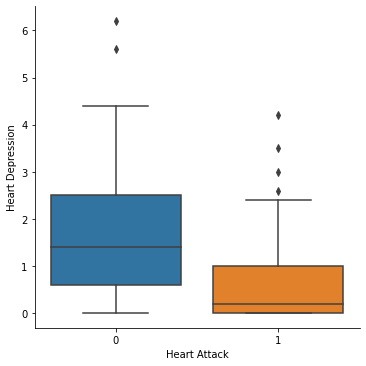

In [51]:
sns.catplot(x="output", y="oldpeak", kind="box", data=df)
plt.xlabel('Heart Attack')
plt.ylabel('Heart Depression')

**Insights from statistical data**

1. People who experience heart attack are on average younger than people who do not experience heart attack.
2. People who suffer from heart attack have lower resting blood pressure.
3. People who suffer from heart attack have similar cholesteral profile to those who do not suffer from it.
4. People with heart attack on average has a higher maximum heart rate.
5. People with heart attack have much lower heart depression compared to those who do not have heart attack.

### Preparing data for prediction

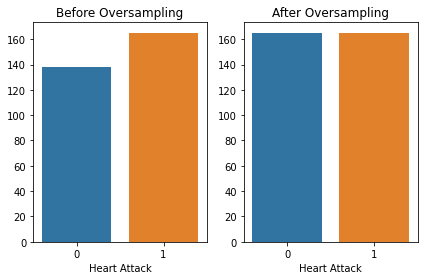

In [63]:
# Using SMOTE to balance the data

from imblearn.over_sampling import SMOTE

fig, axes = plt.subplots(1, 2)

sns.barplot(x=xs, y=ys, ax = axes[0])
axes[0].set_title("Before Oversampling")
axes[0].set_xlabel('Heart Attack')

X = df.drop(columns=['output'])
y = df['output']

sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X, y) 

sns.barplot(x=xs, y =[sum(y == 0), sum(y == 1)], ax= axes[1])
axes[1].set_title("After Oversampling")
axes[1].set_xlabel('Heart Attack')

plt.tight_layout()

In [115]:
# Spliting the Data into Train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

### Create a model for heart attack prediction

In [116]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 84.34%


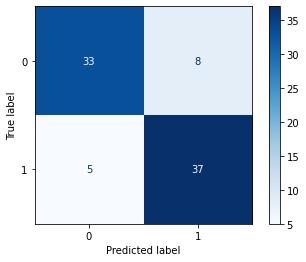

In [117]:
# Plot confusion matrix

plot_confusion_matrix(pipeline, X_test, y_test, cmap='Blues')
plt.grid(False)
plt.show()

### Conclusion

A predictor for heart attack based on the given factors is generated. However, the accuracy is less than the author desired (>95%). More training data is required to improve the accuracy of the predictor.